<a href="https://colab.research.google.com/github/JeromeMberia/user_review_analysis/blob/main/user_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing (NLP)

## Specifying the question

Predict if each textual review is an exchange letters to a good review meaning the customer is happy alternatively a bad one meaning the customer is not satisfied.

### Installing, Importing Essential Libraries, and loading Dataset

In [ ]:
# Installing required packages. 
!pip install wordnet

!pip install wordninja  # used to  split concatenated words into separate words
!pip3 install textblob
!pip install nltk

!pip install textstat


  Created wheel for wordnet: filename=wordnet-0.0.1b2-cp36-none-any.whl size=10522 sha256=baf83ae553337400da9632bd8a6d2147cb48cf3d10e1ced4190efbf834b91a2f
  Stored in directory: /root/.cache/pip/wheels/9f/b7/a9/9f8f3c925c912ac2e8dfa5f8373cd48f18b1074da35b155ad9
Successfully built wordnet
     |████████████████████████████████| 542kB 5.1MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-cp36-none-any.whl size=541553 sha256=270ad69bec540840098a3b6ade4367ec55cf2774915527ff1ba78dcc7fb47954
  Stored in directory: /root/.cache/pip/wheels/22/46/06/9b6d10ed02c85e93c3bb33ac50e2d368b2586248f192a2e22a
Successfully built wordninja
     |████████████████████████████████| 102kB 3.8MB/s 
     |████████████████████████████████| 1.9MB 22.1MB/s 


In [ ]:
# Importing our Essential Libraries
import pandas as pd      # library for data manipulation and analysis
import numpy as np       # library for performin scientific computations
import matplotlib.pyplot as plt  # library for performin scientific computations
import seaborn as sns            # library for creating rich data visualisations


from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import nltk

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk import word_tokenize, ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import wordninja 
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
import spacy #for training the NER model tokenize words
import random
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#uploading and readin the dataset
data = pd.read_csv("/content/user_review_data.csv")
data.head()

review_body  star_rating
0  Good luck finding a reasonably priced band rep...            1
1  No i get dark on the first week with me!! I wi...            1
2  I dont know if mine was a mistake but it clear...            1
3  The rod that holds the bracelet broke several ...            1
4  I bought 2 watches , one watch doesnot work at...            1

### Checking the Data

In [ ]:
#checking the top 5 rows
data.head()

review_body  star_rating
0  Good luck finding a reasonably priced band rep...            1
1  No i get dark on the first week with me!! I wi...            1
2  I dont know if mine was a mistake but it clear...            1
3  The rod that holds the bracelet broke several ...            1
4  I bought 2 watches , one watch doesnot work at...            1

In [ ]:
#checking the bottom 5 rows
data.tail()

review_body  star_rating
14995  I have a TAG Heuer carrera twin time watch, wh...            5
14996  It is hard sometimes to judge a product by its...            5
14997  reloj en perfecto estado llego todo a tiempo l...            5
14998  This is my third ironman.  There are more expe...            5
14999                                  i use it everyday            5

Observation: the data dataset is uniform from top to the borrom. 

In [ ]:
#Getting the dataset shape.
data.shape

(15000, 2)

Observation: dataset has 15000 records and two variables/field/colunms. 

In [ ]:
##Get the summary of this dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_body  15000 non-null  object
 1   star_rating  15000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


observation: our dataset comprise of object and integer datatype. both colunms has 15000 values, this is a clue of no missing values. 

In [ ]:
#checking the body_review variable values
data['review_body'].sample(n=10, random_state=610)

3293     The delivery was prompt. I got the correct pro...
5328                                    not silent running
13737                                         good quality
3751     not happy<br /><br />  the band is very stiff ...
14280                                            Excellent
7552                 A backlight would be a useful feature
13104    So far so good with this product. My fiancée i...
11599    This is a nice watch, however it is a little h...
6004     IT IS OK. SEEMS TO BE A GOOD QUALITY. I RECOME...
2401     Similar to this watch. Undelivered to this dat...
Name: review_body, dtype: object

observation: the values comprises of words, symbols, panctuations and so on.

In [ ]:
#Using groupby will check the data
data.groupby('star_rating').describe()

review_body                       
                  count unique        top freq
star_rating                                   
1                  3000   2935        bad    3
2                  3000   2896         ok    4
3                  3000   2905       good    7
4                  3000   2929       Good   11
5                  3000   2896  Excellent    8

observation: this is the preview of dataset based on the rating. all the star rating have similar value count. 

In [ ]:
#previewing the dataset variables
data.columns

Index(['review_body', 'star_rating'], dtype='object')

observation: the two colunms are, review_body, and star_rating

## Pre Processing the Data.

Here we will check for remove any unnecessary variables/features/columns if any, duplicates and  other preprocessing procedures are tokenizing(spliting), and lemmatization.


### Data cleaning

In [ ]:
#Checking for duplicates
data.duplicated().sum()

439

observation: there are 439 duplicates.

In [ ]:
#dropping the duplicates
data.drop_duplicates(inplace=True)
#
#confirming no duplicates
data.duplicated().any()

False

observation: duplicates have been dropped.

In [ ]:
#checking for the missing values
data.isnull().sum()

review_body    0
star_rating    0
dtype: int64

observation: there is no missing values

In [ ]:
# Finding Rare and unique Words
# --
data_corpus1= data.copy()
#
rare_words= pd.Series(' '.join(data_corpus1.review_body).split()).value_counts()[-100:]
rare_words

watch--not               1
horror                   1
Crystal:                 1
/>congratulations.<br    1
nivel.                   1
                        ..
w/ith                    1
\\"icons\\"              1
them/they're             1
rec'd                    1
Yours                    1
Length: 100, dtype: int64

In [ ]:
data_corpus= data.copy()

In [ ]:
#Removing panctuation, HTML, words containing numbers, and changing the whole review to lower case.
import re # this is library for regular expressions, we write our pre-processing function:
def clean_text_round1(text):
  '''Remove HTML tags, remove punctuation, make text lowercase, remove punctuation and remove words containing numbers.'''
  text = re.sub('<.*?>','', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = text.lower()
  text = re.sub('\d', '', text)
  return text

fix = lambda x: clean_text_round1(x)
data_corpus['review_body'] = pd.DataFrame(data_corpus.review_body.apply(fix))
data_corpus

review_body  star_rating
0      good luck finding a reasonably priced band rep...            1
1      no i get dark on the first week with me i will...            1
2      i dont know if mine was a mistake but it clear...            1
3      the rod that holds the bracelet broke several ...            1
4      i bought  watches  one watch doesnot work at a...            1
...                                                  ...          ...
14995  i have a tag heuer carrera twin time watch who...            5
14996  it is hard sometimes to judge a product by its...            5
14997  reloj en perfecto estado llego todo a tiempo l...            5
14998  this is my third ironman  there are more expen...            5
14999                                  i use it everyday            5

[14561 rows x 2 columns]

In [ ]:
#import wordninja 
from textblob import TextBlob

# Performing our splitting 

# 
data_corpus['review_body'] = data_corpus.review_body.apply(lambda x: wordninja.split(str(TextBlob(x))))  
data_corpus['review_body'] = data_corpus['review_body'].apply(lambda x: ' '.join(x))
print(data_corpus.head())

                                         review_body  star_rating
0  good luck finding a reasonably priced band rep...            1
1  no i get dark on the first week with me i will...            1
2  i dont know if mine was a mistake but it clear...            1
3  the rod that holds the bracelet broke several ...            1
4  i bought watches one watch does not work at al...            1


In [ ]:
data_corpus.sample(50)

review_body  star_rating
9274   have had a g shock in recent years but as my e...            4
9130   a simple but classy watch looks better then th...            4
11197  very attractive watch and very importantly was...            4
11419  very heavy stainless steel watch with fine bui...            4
14434                                         neat watch            5
3181                   i don t like very much look cheap            2
11424  this is the third wha v watch in a row that i ...            4
4680   the watchband is unsuitable for people with a ...            2
8912   i took the watch to a jeweler to have some lin...            3
7886   this is about the nicest travel alarm clock i ...            3
7434                      nice prod ct s and good seller            3
14520  it was a perfect replacement for my casio g sh...            5
2409                          it was broke when i got it            1
4982   i wouldnt recommend purchasing this watch band...            2
6183   this case is quite small and too tight for mos...            3
10865  the band is most definitely not leather but th...            4
973    do not buy these watches every one broke in on...            1
13366  i originally saw this watch in penney s and be...            5
13056                     fits perfectly around my wrist            5
3615   i wanted to see how this product looked on me ...            2
13907  gorgeous watch and a great price just pay atte...            5
4940   delivery was on time but it is missing one eye...            2
1638   very low quality i would expect more if the or...            1
10760  i like the size of this particular model on my...            4
5176   ive had the watch a few years now its a great ...            2
13414  this is a very well made watch i love that it ...            5
4704   i needed a watch for a new job and did not wan...            2
750    jb w mens j blp saxon black designer diamond b...            1
2909   cheap band the stitching started coming apart ...            1
14986  my daughter loved this item it arrived exactly...            5
14279  im always looking for new unique watches and c...            5
7370   at that price its likely chin es dog leather b...            3
1134   had this for a while before i started to wear ...            1
10573  this watch is about the least expensive way to...            4
4315   i got this to swim with and after a few months...            2
5518   way too large for a child even too large for h...            2
9207                                                nice            4
8894   on the plus side the watch arrived in good con...            3
9639   very nice and the size is just good for me not...            4
11173  delivered promptly and efficiently as promised...            4
4086   it was not water resistant and when i called a...            2
2781   i purchased this watch last week and it arrive...            1
6803   this is a good looking well built inexpensive ...            3
849     will not stay connected to my phone wasted money            1
5110   this is a lightweight watch and barely noticea...            2
3651                                           its cheap            2
13567  incredibly fast service ordered on a thursday ...            5
9356   easy to read face with a comfortable adjustabl...            4
7892   gorgeous watch unfortunately im having to retu...            3
10246  i really love the classic look of this watch b...            4

In [ ]:
data_corpus['review_body'] = data_corpus['review_body'].apply(nltk.word_tokenize)

In [ ]:
data_corpus['review_body']

0        [good, luck, finding, a, reasonably, priced, b...
1        [no, i, get, dark, on, the, first, week, with,...
2        [i, dont, know, if, mine, was, a, mistake, but...
3        [the, rod, that, holds, the, bracelet, broke, ...
4        [i, bought, watches, one, watch, does, not, wo...
                               ...                        
14995    [i, have, a, tag, heuer, carrera, twin, time, ...
14996    [it, is, hard, sometimes, to, judge, a, produc...
14997    [rel, oj, en, perfect, o, estado, l, lego, to,...
14998    [this, is, my, third, ironman, there, are, mor...
14999                               [i, use, it, everyday]
Name: review_body, Length: 14561, dtype: object

In [ ]:
data_corpus["review_body"][5]

['this',
 'watch',
 'would',
 'have',
 'been',
 'fantastic',
 'if',
 'it',
 'had',
 'nt',
 'been',
 'so',
 'hard',
 'to',
 'set',
 'up',
 'and',
 'actually',
 'worked',
 'properly',
 'it',
 'took',
 'so',
 'many',
 'tries',
 'to',
 'get',
 'it',
 'into',
 'the',
 'mode',
 'where',
 'we',
 'could',
 'set',
 'up',
 'hours',
 'minutes',
 'finally',
 'we',
 'did',
 'that',
 'then',
 'the',
 'watch',
 'screen',
 'wouldnt',
 'dim',
 'anymore',
 'eventually',
 'it',
 'got',
 'to',
 'the',
 'point',
 'where',
 'all',
 'of',
 'the',
 'lights',
 'turned',
 'off',
 'and',
 'would',
 'not',
 'come',
 'back',
 'on',
 'i',
 'would',
 'recommend',
 'to',
 'anyone',
 'that',
 'is',
 'considering',
 'buying',
 'this',
 'watch',
 'to',
 'spend',
 'a',
 'little',
 'extra',
 'money',
 'and',
 'get',
 'one',
 'that',
 'is',
 'better',
 'quality',
 'with',
 'this',
 'one',
 'you',
 'basically',
 'get',
 'what',
 'you',
 'paid',
 'for',
 'not',
 'a',
 'whole',
 'lot']

In [ ]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

data_corpus['review_body'] = data_corpus['review_body'].apply(lemmatize_text)

In [ ]:
data_corpus['review_body']

0        [good, luck, finding, a, reasonably, priced, b...
1        [no, i, get, dark, on, the, first, week, with,...
2        [i, dont, know, if, mine, wa, a, mistake, but,...
3        [the, rod, that, hold, the, bracelet, broke, s...
4        [i, bought, watch, one, watch, doe, not, work,...
                               ...                        
14995    [i, have, a, tag, heuer, carrera, twin, time, ...
14996    [it, is, hard, sometimes, to, judge, a, produc...
14997    [rel, oj, en, perfect, o, estado, l, lego, to,...
14998    [this, is, my, third, ironman, there, are, mor...
14999                               [i, use, it, everyday]
Name: review_body, Length: 14561, dtype: object

In [ ]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
data_corpus['review_body'] = data_corpus['review_body'].apply(lambda x:remove_stopword(x))
data_corpus['review_body']

0        [good, luck, finding, reasonably, priced, band...
1          [get, dark, first, week, never, buy, item, buy]
2        [dont, know, mine, wa, mistake, clearly, state...
3        [rod, hold, bracelet, broke, several, time, co...
4        [bought, watch, one, watch, doe, work, watch, ...
                               ...                        
14995    [tag, heuer, carrera, twin, time, watch, whose...
14996    [hard, sometimes, judge, product, picture, wat...
14997    [rel, oj, en, perfect, estado, l, lego, tiempo...
14998    [third, ironman, expensive, sport, watch, iron...
14999                                      [use, everyday]
Name: review_body, Length: 14561, dtype: object

In [ ]:
data_corpus['review_body'] = data_corpus['review_body'].apply(lambda x: ' '.join(x))

cv = CountVectorizer()
text_1 = cv.fit_transform(data_corpus['review_body'])

In [ ]:
data_DTM = pd.DataFrame(text_1.toarray(), columns=cv.get_feature_names(), index=data_corpus.index)
data_DTM['star_rating'] = data_corpus['star_rating']
data_DTM.head()


aaa  aaaa  aaaaaa  aad  ab  aba  ...  zulu  zum  zurich  zx  zy  star_rating
0    0     0       0    0   0    0  ...     0    0       0   0   0            1
1    0     0       0    0   0    0  ...     0    0       0   0   0            1
2    0     0       0    0   0    0  ...     0    0       0   0   0            1
3    0     0       0    0   0    0  ...     0    0       0   0   0            1
4    0     0       0    0   0    0  ...     0    0       0   0   0            1

[5 rows x 12887 columns]

In [ ]:
data_DTM.star_rating.unique()

array([1, 2, 3, 4, 5])

In [ ]:
data_DTM.shape

(14561, 12887)

In [ ]:
# extracting information
#function for rule 
def rule(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [ ]:
#import spacy
import spacy
from spacy.matcher import Matcher 

from spacy import displacy 
from IPython.display import Image, display

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
data_corpus1=data_corpus.copy()
# data_corpus1 contains all the sentences from all the customer review
row_list = []


for index, row in data_corpus1.iterrows():
  review_body = data_corpus1.loc[index,'review_body']
  star_rating = data_corpus1.loc[index,'star_rating']
  output = rule2(review_body)
  dict1 = {'star_rating':star_rating,'review_body':review_body,'selected_text':output}
  row_list.append(dict1)
    
df_rule_all = pd.DataFrame(row_list)

In [ ]:
df_rule_all

star_rating  ...                                      selected_text
0                1  ...  [band replacement, band dealer, unique watch d...
1                1  ...                                                 []
2                1  ...  [confused mine, irritated people, late one, mu...
3                1  ...        [hold bracelet, company fix sitting drawer]
4                1  ...                      [run time, online money time]
...            ...  ...                                                ...
14556            5  ...  [due sweat weather, tag replacement price, inn...
14557            5  ...  [product picture, look price, old watch batter...
14558            5  ...                                                 []
14559            5  ...                                         [easy use]
14560            5  ...                                                 []

[14561 rows x 3 columns]

In [ ]:
# selecting non-empty outputs
data_corpus1= pd.DataFrame(columns=df_rule_all.columns)

for row in range(len(df_rule2_all)):
    
    if len(df_rule2_all.loc[row,'selected_text'])!=0:
        data_corpus1 = data_corpus1.append(df_rule2_all.loc[row,:])

# reset the index
data_corpus1.reset_index(inplace=True)
data_corpus1.drop('index',axis=1,inplace=True)  

In [ ]:
data_corpus1

star_rating  ...                                      selected_text
0               1  ...  [band replacement, band dealer, unique watch d...
1               1  ...  [confused mine, irritated people, late one, mu...
2               1  ...        [hold bracelet, company fix sitting drawer]
3               1  ...                      [run time, online money time]
4               1  ...  [hour minute, point light, little extra money,...
...           ...  ...                                                ...
11404           5  ...                                  [heavy duty trip]
11405           5  ...   [many watch, luminous gold finish, catch people]
11406           5  ...  [due sweat weather, tag replacement price, inn...
11407           5  ...  [product picture, look price, old watch batter...
11408           5  ...                                         [easy use]

[11409 rows x 3 columns]

In [ ]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        return "Negative"
    else:
        return "Positive"
data_corpus1['sentiment']  = data_corpus1['review_body'].apply(lambda x: sentiment_analyse(x)) 

In [ ]:
data_corpus1

star_rating  ... sentiment
0               1  ...  Negative
1               1  ...  Negative
2               1  ...  Negative
3               1  ...  Negative
4               1  ...  Positive
...           ...  ...       ...
11404           5  ...  Positive
11405           5  ...  Positive
11406           5  ...  Positive
11407           5  ...  Positive
11408           5  ...  Positive

[11409 rows x 4 columns]

In [ ]:
def clean_text(review_body):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    review_body = str(selected_text).lower()
    review_body= re.sub('\[.*?\]','[]', '', text) #remove square brackets
    review_body = re.sub('https?://\S+|www\.\S+', '', review_body)  #remove links
    review_body= re.sub('<.*?>+', '', review_body)
    review_body = re.sub('[%s]' % re.escape(string.punctuation), '', review_body)
    review_body = re.sub('\n', '', review_body)
    review_body = re.sub('\w*\d\w*', '', review_body)  #Keep words only
    return review_body

In [ ]:
data_corpus1

star_rating  ... sentiment
0               1  ...  Negative
1               1  ...  Negative
2               1  ...  Negative
3               1  ...  Negative
4               1  ...  Positive
...           ...  ...       ...
11404           5  ...  Positive
11405           5  ...  Positive
11406           5  ...  Positive
11407           5  ...  Positive
11408           5  ...  Positive

[11409 rows x 4 columns]

## Performing EDA(Exploratory Data Analysis)

Exploratory Data Analysis is an approach of perfoming initial investigations on data in order to discover hidden patterns,test hypothesis and identify outliers. It enables us to see what the data can tell us beyond formal modeling

In [ ]:
#looking  at the distribution of feedback in this data_corpus data
feedback_dist = data_corpus1.groupby('sentiment').count()['review_body'].reset_index().sort_values(by='review_body',ascending=False)
feedback_dist.style.background_gradient(cmap='Purples')

observation: there is more positive customer reviews compared to

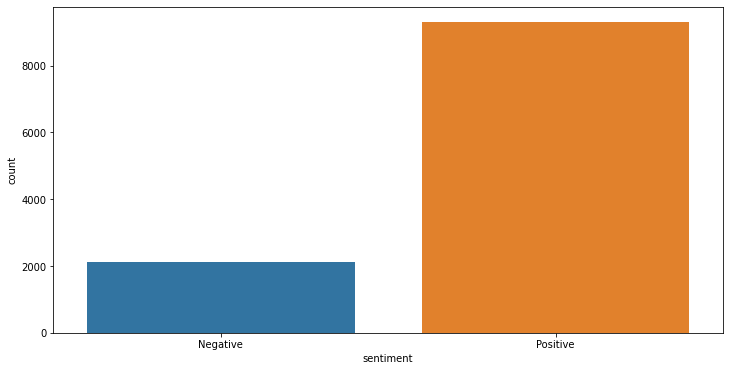

In [ ]:
plt.figure(figsize=(12,6))     #width and height
sns.countplot(x='sentiment',data=data_corpus1)

observation: there is more positive customer reviews compared to negative.

In [ ]:
#visualizing sentiments with funnel charts
#
#checking sentiment distribution
from plotly import graph_objs as go
# Create distribution plot with custom bin_size
fig.update_layout(title_text='Distribution of Number Of reviews')
fig.update_layout(
    autosize=False,
    width=700,
    height=600,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

observation: postive feedbacks translates to 81.5% of the total feedback 

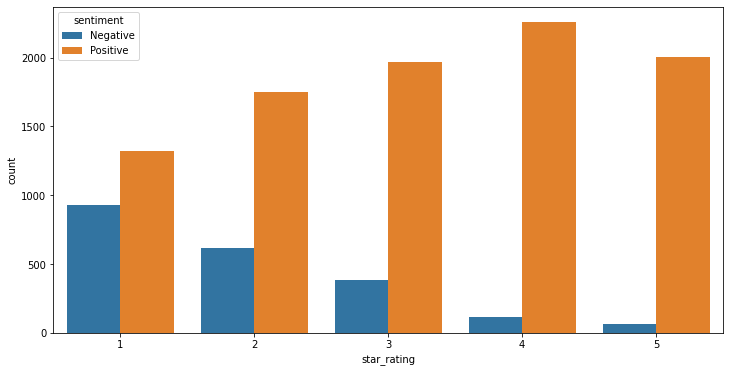

In [ ]:
plt.figure(figsize=(12,6))     #width and height
sns.countplot(x='star_rating', data = data_corpus1, hue='sentiment')

observation; 

Star rating of 1 had the highest negative review followed bt star rating of 2.

star rating of 4 and 5 had the lowest negative words in their review. this is expected as the customer can have a few pointer even if he is satisfied with the product.


In [ ]:
Positive_sent = data_corpus1[data_corpus1['sentiment']=='Positive']
Negative_sent = data_corpus1[data_corpus1['sentiment']=='Negative']

In [ ]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['selected_text'] for item in sublist])
review_positive = pd.DataFrame(top.most_common(20))
review_positive.columns = ['Common_positive_words','count']
review_positive.style.background_gradient(cmap='Greens')

In [ ]:
#visualizing the most common words.
import plotly.express as px
fig = px.bar(review_positive, x="count", y="Common_positive_words", title='Commmon Words in review', orientation='h', 
             width=700, height=700,color='Common_positive_words')
fig.show()

In [ ]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['selected_text'] for item in sublist])
freq_negative = pd.DataFrame(top.most_common(20))
freq_negative = temp_negative.iloc[1:,:]
freq_negative.columns = ['Common_negative_words','count']
freq_negative.style.background_gradient(cmap='Reds')

In [ ]:
#visualizing the most common negative words.
import plotly.express as px
fig = px.bar(freq_negative, x="count", y="Common_negative_words", title='Commmon Negative Words in review', orientation='h', 
             width=700, height=700,color='Common_negative_words')
fig.show()

observation: looking at the common words of each sentiments, we now get much clarity about the data. these words are very strong determiners of sentiment of reviews. 





## Generating Meta-Features
This is designed to extract general properties that are able to characterize datasets and give us further understanding of the data


we will use difference In Number Of word review  and  Selected_review_text.

In [ ]:
#checking the number of words in each review

data_corpus1['Num_word_review'] = data_corpus1['review_body'].apply(lambda x:len(str(x).split())) #Number Of words in main text
data_corpus1['Num_review_select'] = data_corpus1['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
data_corpus1['difference_in_words'] = data_corpus1['Num_word_review'] - data_corpus1['Num_review_select'] #Difference in Number of words text and Selected Text
data_corpus1

star_rating  ... difference_in_words
0               1  ...                  31
1               1  ...                  34
2               1  ...                  17
3               1  ...                  25
4               1  ...                  43
...           ...  ...                 ...
11404           5  ...                   8
11405           5  ...                   8
11406           5  ...                  54
11407           5  ...                  41
11408           5  ...                  10

[11409 rows x 7 columns]

In [ ]:
hist_data = [data_corpus1['Num_word_review'],data_corpus1['Num_review_select']]

group_labels = ['selected_text', 'review_body']

import plotly.figure_factory as ff
# Create distribution plot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=True)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

observation: The number of word distribution is skewed to the right since we have very less review  with words greater than 50. Skewness is a measure of symmetry of the probability distribution.

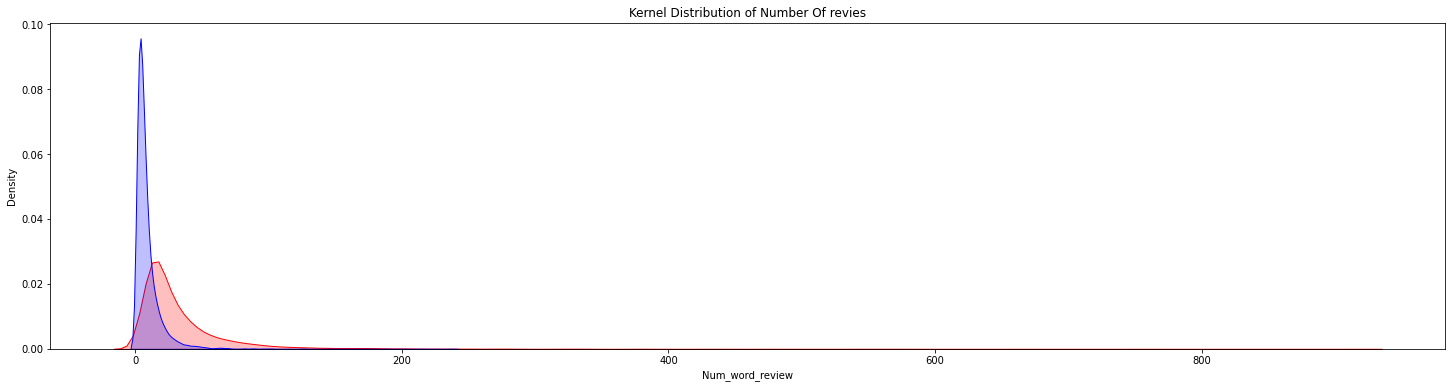

In [ ]:
plt.figure(figsize=(25,6))
p1=sns.kdeplot(data_corpus1['Num_word_review'], shade=True, color="r").set_title('Kernel Distribution of Number Of revies')
p1=sns.kdeplot(data_corpus1['Num_review_select'], shade=True, color="b")

Observation: review words are skewed to the right. 

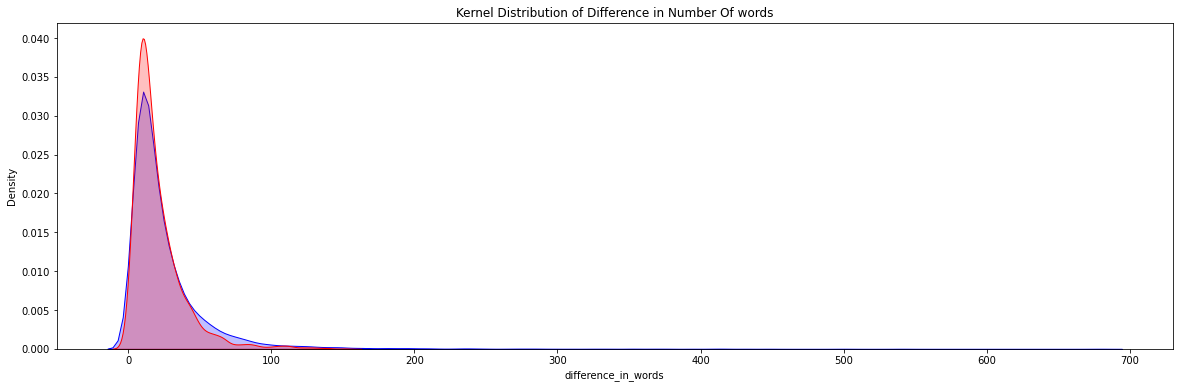

In [ ]:
plt.figure(figsize=(20,6))
p1=sns.kdeplot(data_corpus1[data_corpus1['sentiment']=='Positive']['difference_in_words'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(data_corpus1[data_corpus1['sentiment']=='Negative']['difference_in_words'], shade=True, color="r")

observation: No major difference between number of words in negative and positive sentiments as they are both skewed to the right. 
plot that there is peak for negative and positive plot around 30.

### Word Cloud

We will be building wordclouds in the following order:
*   WordCloud of positive review
*   WordCloud of Positive review






In [ ]:
#defining wordcloud function

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

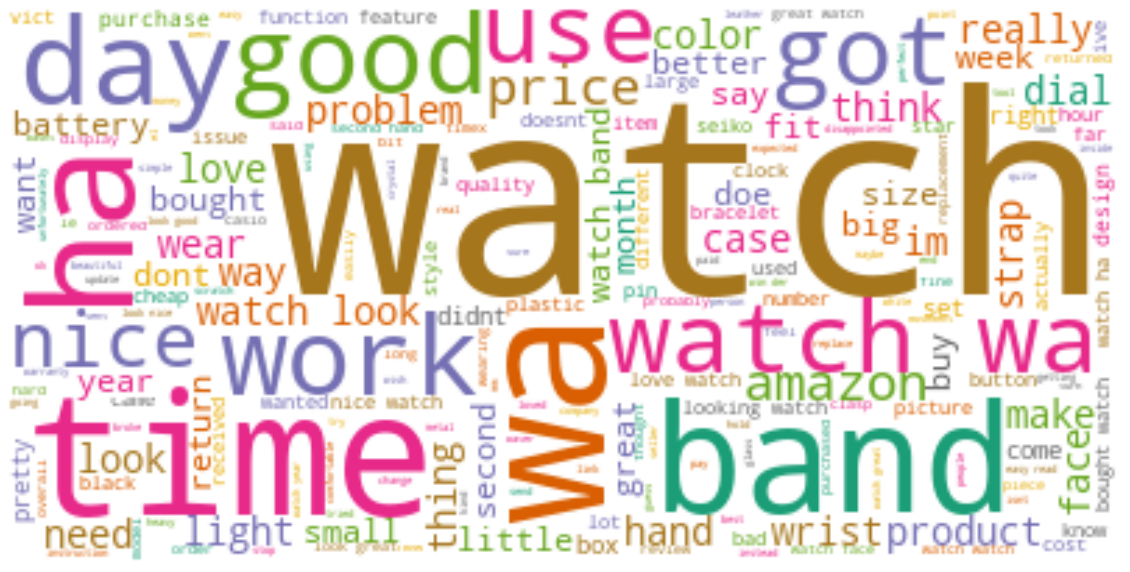

In [ ]:
word_cloud_view("all")

Word Cloud

In [ ]:
stop_words = text.ENGLISH_STOP_WORDS

wc = WordCloud(stopwords=None, background_color="white", colormap="Dark2",
               max_font_size=100, random_state=42)

plt.rcParams['figure.figsize'] = [20, 20]

def word_cloud_view(selected_rating):
  if selected_rating == "all":
    feedback = data_corpus['review_body'].str.cat(sep=' ')
  else:
    selected_rating = int(selected_rating)
    feedback = data_corpus[data_corpus['star_rating']==selected_rating]['review_body'].str.cat(sep=' ')

  stopwords = stop_words
  querywords = feedback.split()

  resultwords  = [word for word in querywords if word.lower() not in stopwords]
  result = ' '.join(resultwords)

  wc.generate(result)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()

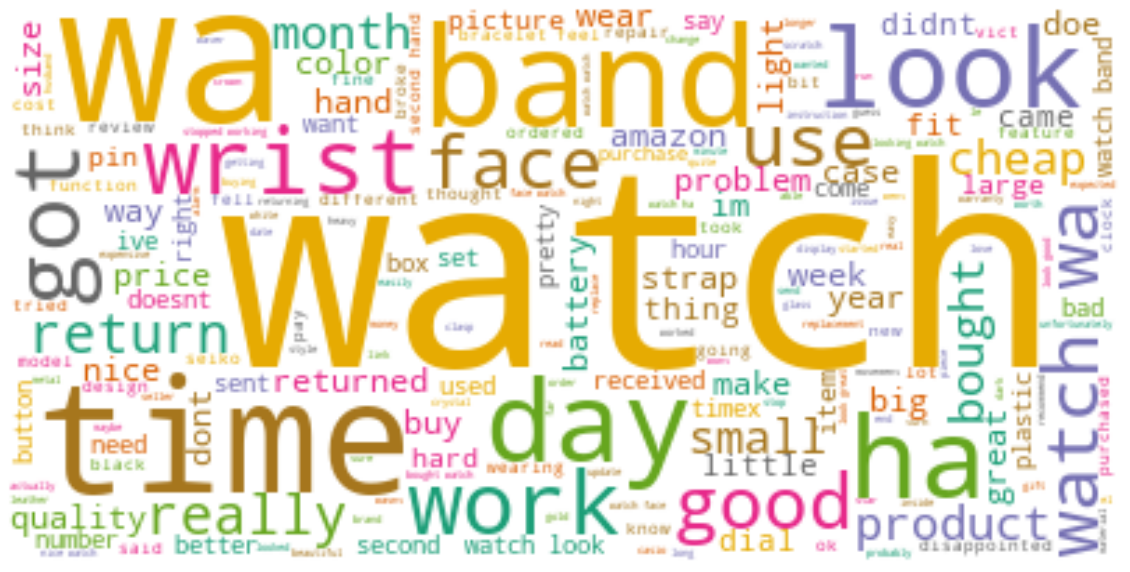

In [ ]:
word_cloud_view(2)

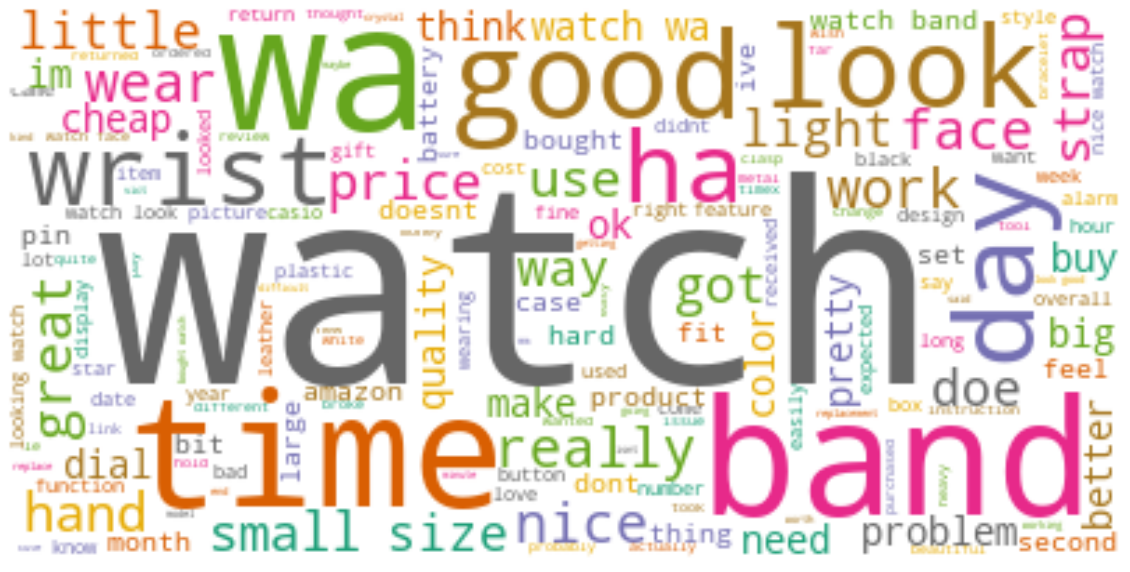

In [ ]:
word_cloud_view(3)

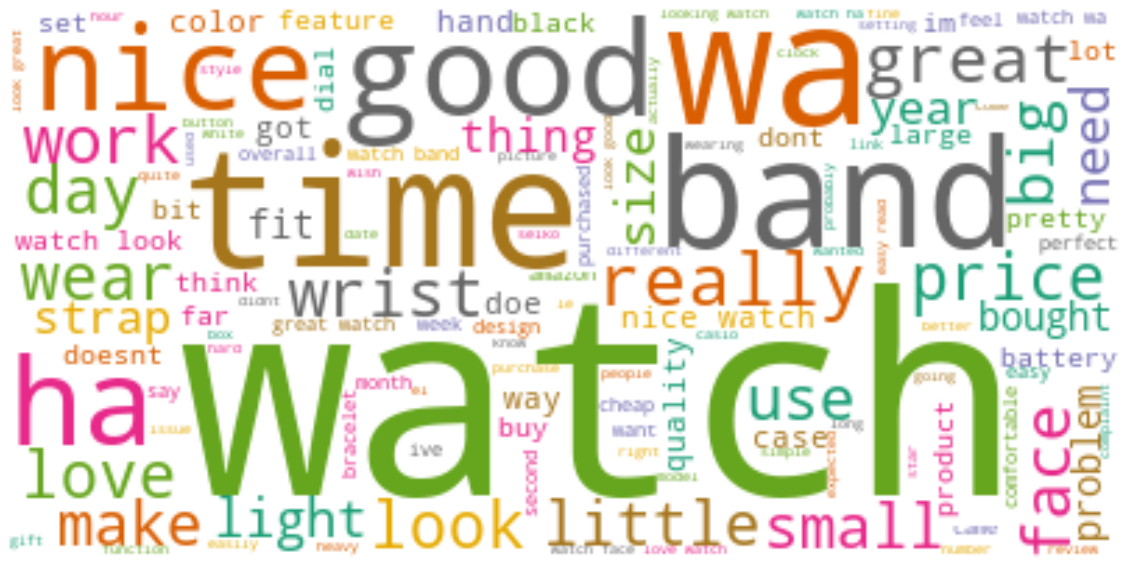

In [ ]:
word_cloud_view(4)

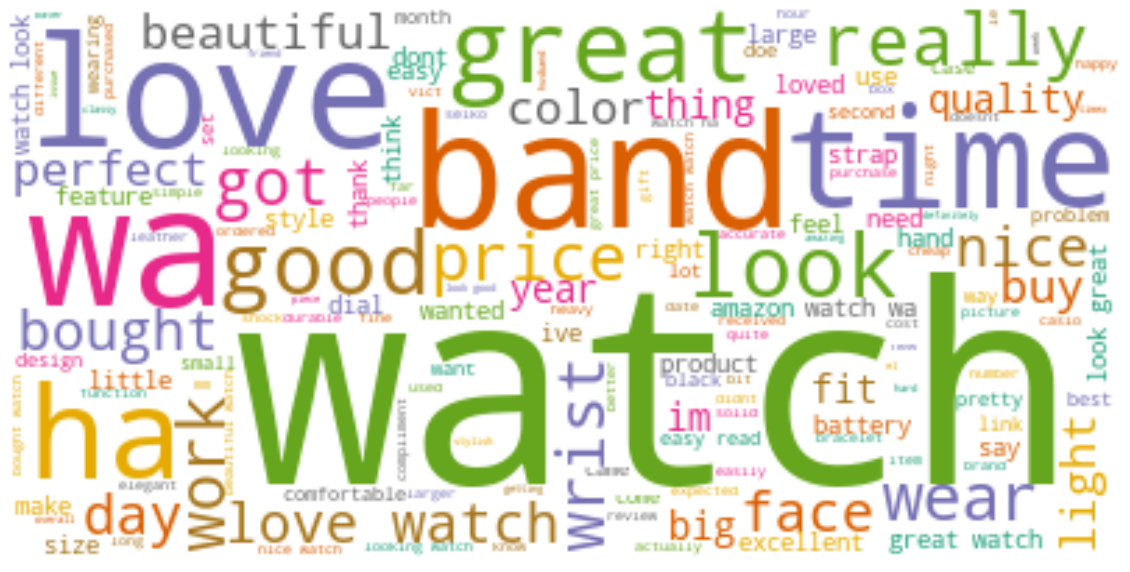

In [ ]:
word_cloud_view(5)

### Count / Density / Readability Features
### Language support

In [ ]:
import textstat

 List of Functions

Syllable Count

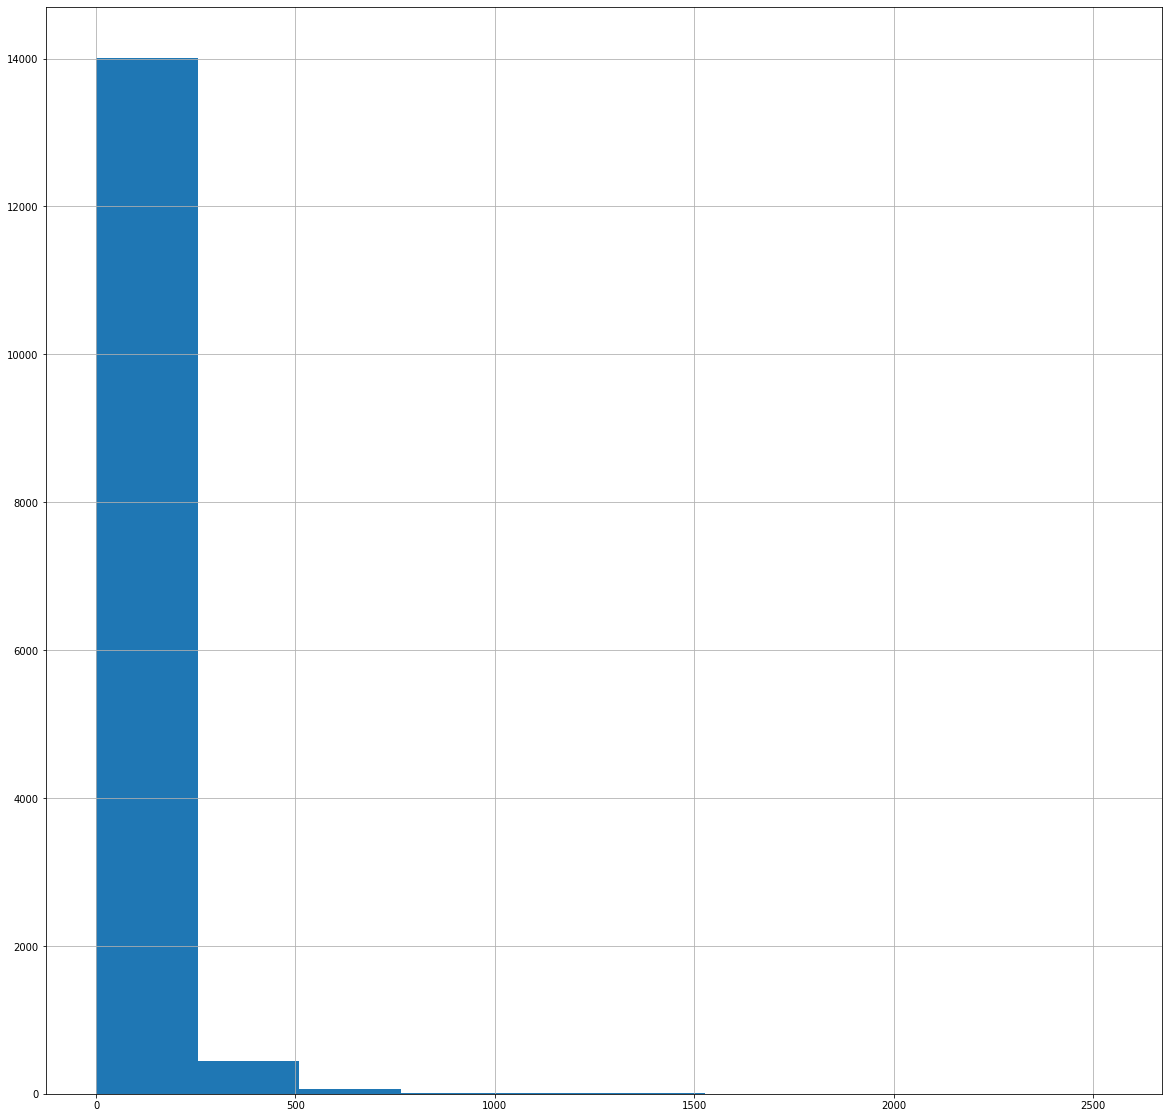

In [ ]:
data_corpus0= data_corpus.copy()
# Returns the number of syllables present
#textstat.syllable_count(data_corpus2['review_body'])
data_corpus0['syllable_count'] = data['review_body'].apply(lambda x: textstat.syllable_count(x))
data_corpus0['syllable_count'].hist()

Lexicon Count

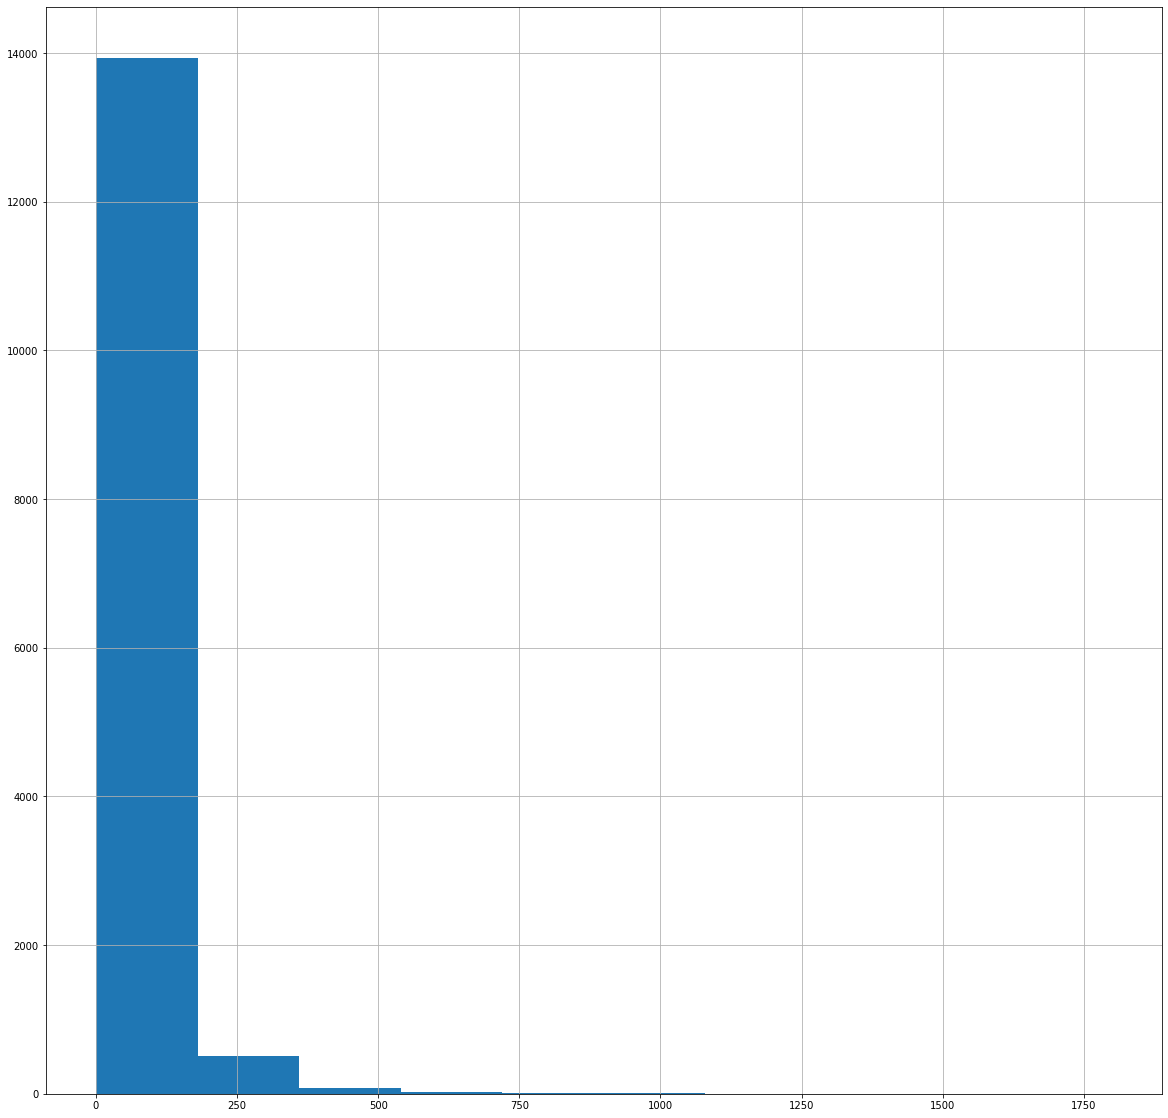

In [ ]:
#Calculates the number of words present
data_corpus0['lexicon_count'] = data['review_body'].apply(lambda x: textstat.lexicon_count(x))
data_corpus0['lexicon_count'].hist()
#textstat.lexicon_count(message_bagwords, removepunct=True)

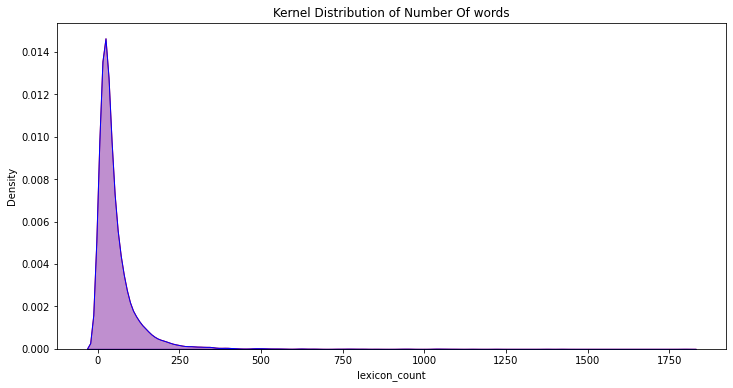

In [ ]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(data_corpus0['lexicon_count'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(data_corpus0['lexicon_count'], shade=True, color="b")

Sentence Count

In [ ]:
#Returns the number of sentences present
#textstat.sentence_count(text)
data_corpus0['sentence_count'] = data['review_body'].apply(lambda x: textstat.sentence_count(x))
data_corpus0['sentence_count']

0        3
1        2
2        5
3        3
4        4
        ..
14995    5
14996    1
14997    1
14998    1
14999    1
Name: sentence_count, Length: 14561, dtype: int64

The Flesch Reading Ease formula

In [ ]:
#Returns the Flesch Reading Ease Score
#textstat.flesch_reading_ease(text)
data_corpus0['flesch_reading'] = data_corpus0['review_body'].apply(lambda x: textstat.flesch_reading_ease(x))
data_corpus0['flesch_reading']

0         49.83
1        105.66
2         36.29
3         65.05
4         66.41
          ...  
14995     -0.94
14996     20.39
14997     69.45
14998     67.76
14999     35.61
Name: flesch_reading, Length: 14561, dtype: float64

Automated Readability Index

In [ ]:
#Returns the ARI (Automated Readability Index) which outputs a number that approximates the grade level needed to comprehend the text.
#textstat.automated_readability_index(text)
data_corpus0['automated_readability'] = data_corpus0['review_body'].apply(lambda x: textstat.automated_readability_index(x))
data_corpus0['automated_readability']

0        21.3
1         0.8
2        23.9
3        12.4
4        17.1
         ... 
14995    38.2
14996    35.7
14997     7.1
14998     8.9
14999     5.5
Name: automated_readability, Length: 14561, dtype: float64

Linsear Write Formula

In [ ]:
#Returns the grade level using the Linsear Write Formula
#textstat.linsear_write_formula(text)
data_corpus0['linsear_write_formula'] = data_corpus0['review_body'].apply(lambda x: textstat.linsear_write_formula(x))
data_corpus0['linsear_write_formula']

0        23.0
1         3.0
2        24.5
3        15.5
4        17.0
         ... 
14995    42.5
14996    37.5
14997    14.5
14998     6.0
14999     1.0
Name: linsear_write_formula, Length: 14561, dtype: float64

Dale-Chall Readability Score

In [ ]:
 #lookup table of the most commonly used 3000 English words
#textstat.dale_chall_readability_score(text)
data_corpus0['dale_chall_readability_score'] = data_corpus0['review_body'].apply(lambda x: textstat.dale_chall_readability_score(x))
data_corpus0['dale_chall_readability_score']

0         8.85
1         0.40
2         8.71
3         1.83
4         6.70
         ...  
14995    12.53
14996     9.08
14997     8.48
14998     9.50
14999     0.10
Name: dale_chall_readability_score, Length: 14561, dtype: float64

Readability Consensus based upon all the above tests

In [ ]:
#returns the estimated
#textstat.text_standard(text, float_output=False)
data_corpus0['text_standard'] = data_corpus0['review_body'].apply(lambda x: textstat.textstat.text_standard(x), float_output=False)
data_corpus0['text_standard']

TypeError: ignored

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
all_words = ' '.join([text for text in data_corpus['review_body']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in data_corpus['review_body'][data_corpus['star_rating'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
negative_words = ' '.join([text for text in data_corpus['review_body'][data_corpus['sentiment'] =="Negative"]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
data_corpus0['char_count'] = data_corpus0['review_body'].apply(len)
data_corpus0['word_count'] = data_corpus0['review_body'].apply(lambda x: len(x.split()))
data_corpus0['word_density'] = data_corpus0['char_count'] / (data_corpus0['word_count']+1)
data_corpus0['punctuation_count'] = data_corpus0['review_body'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
data_corpus0['title_word_count'] = data_corpus0['review_body'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data_corpus0['upper_case_word_count'] = data_corpus0['review_body'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
data_corpus0

# Text Clustering

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(data_corpus.text.values)
features = vec.transform(data_corpus.text.values)

In [ ]:
# for reproducibility
random_state = 0 
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [ ]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

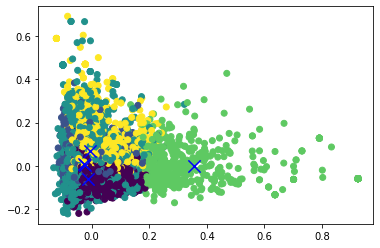

In [ ]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [ ]:
#Evalauation with labelled dataset
from sklearn.metrics import homogeneity_score
homogeneity_score(data_corpus.label, cls.predict(features))

0.025158727702390703

In [ ]:
#Evaluation with unlabelled dataset
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.004450828776364423

## Topic modelling

In [ ]:
# number of topics to extract
n_topics = 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(data_corpus.text)

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
      print(feature_names[fid], end=' ')
    print()

0 watch wa band time like wrist battery day look face work ha really small dont 
1 good quality price product look looking watch excellent thank buy expected deal value cheap really 
2 love watch beautiful husband color bought son wife perfect compliment gift wear absolutely really daughter 
3 nice watch looking look price big really like little heavy small large size quality cheap 
4 great price look watch product work quality looking buy feel gift wear value awesome easy 


## Nearest Neighbors Search

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=10_000)
features = vec.fit_transform(data_corpus.text)
print(features.shape) # (11314, 10000)

(14561, 10000)


In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(features)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [ ]:
knn.kneighbors(features[0:1], return_distance=False)

array([[    0,  9510,   941,  5770, 11258,  7582,  3145,  1087,  9675,
         4469]])

In [ ]:
knn.kneighbors(features[0:1], return_distance=True)

(array([[0.        , 0.70865696, 0.72172618, 0.7233778 , 0.72402791,
         0.72402791, 0.72402791, 0.73619253, 0.74756616, 0.75289153]]),
 array([[    0,  9510,   941,  5770, 11258,  7582,  3145,  1087,  9675,
          4469]]))

In [ ]:
input_texts = ["hello received item working battery dead disappointed purchased?", "watch was not worth this but good"]
input_features = vec.transform(input_texts)

D, N = knn.kneighbors(input_features, n_neighbors=2, return_distance=True)

for input_text, distances, neighbors in zip(input_texts, D, N):
    print("Input text = ", input_text[:200], "\n")
    for dist, neighbor_idx in zip(distances, neighbors):
        print("Distance = ", dist, "Neighbor idx = ", neighbor_idx)
        print(data_corpus.text[neighbor_idx][:200])
        print("-"*200)
    print("="*200)
    print()

Input text =  hello received item working battery dead disappointed purchased? 

Distance =  0.0 Neighbor idx =  917
made husband wrist break
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Distance =  0.45220215615199266 Neighbor idx =  334
disappointed item battery wa already dead
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Input text =  watch was not worth this but good 

Distance =  0.300821882117844 Neighbor idx =  1005
returned almost immediately hard set base time actually couldnt tell wa broken really bad design alarm could get set wanted quiet useless since wanted especially travel alarm feature even wa easy set 
-----------------------------------------------------------